In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
sys.path.append("..")
from semif_utils import get_bbox_dict_from_csv

ImportError: cannot import name 'get_bbox_dict_from_csv' from 'semif_utils' (unknown location)

In [ ]:
csv_path = "../data/data/trial/NC_2022-03-29/detections.csv"

df = pd.read_csv(csv_path).drop(columns=['Unnamed: 0'])
uniq_imgname = list(df.imgname.unique())
bbox_dict = {}
for idx, img in enumerate(uniq_imgname):
    newdf = df[df["imgname"]== uniq_imgname[idx]]
    newdf = newdf.reset_index(drop=True)
    newdf = newdf.drop(columns=['imgname'])
    bbox_dict[uniq_imgname[idx]] = newdf.to_dict(orient='dict')
    



In [ ]:
import cv2
img_path = "/home/admin_mkutugata/SemiF-AnnotationPipeline/data/data/trial/NC_2022-03-29/developed/row1_2.jpg"
img = cv2.imread(img_path)

In [ ]:
bbox_dict = get_bbox_dict_from_csv(csv_path)
bboxes = bbox_dict["row1_6.jpg"]
xmins = bboxes["xmin"]
xmaxes = bboxes["xmax"]
ymins = bboxes["ymin"]
ymaxes = bboxes["ymax"]
conf = bboxes["confidence"]
clses = bboxes["class"]
fnames = bboxes["name"]


TypeError: list indices must be integers or slices, not str

In [ ]:
for idx in range(len(bboxes)):
    
    # Crop image to bbox
    x1 = int(xmins[idx])
    x2 = int(xmaxes[idx])
    y1 = int(ymins[idx])
    y2 = int(ymaxes[idx])
    cf = conf[idx]
    cls = clses[idx]
    fname = fnames[idx]
    imgsub = img[y1:y2, x1:x2]

    # print(x1,x2,y1,y2,cf,cls,fname)

NameError: name 'xmins' is not defined

In [ ]:
plt.imshow(imgsub)

NameError: name 'plt' is not defined

In [2]:

dir_parts = Path("/home/admin_mkutugata/SemiF-AnnotationPipeline/data/data/trial/NC_2022-03-29").parts
states = ['TX', 'NC', 'MD']
fdirname = [p for st in states for p in dir_parts if st in p]
fdirname

NameError: name 'Path' is not defined

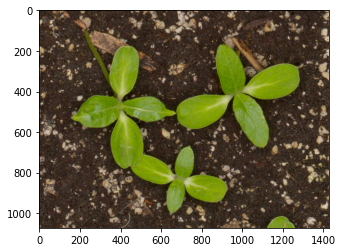

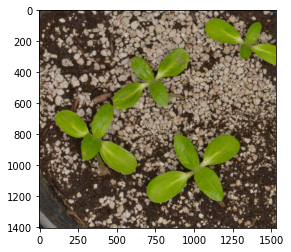

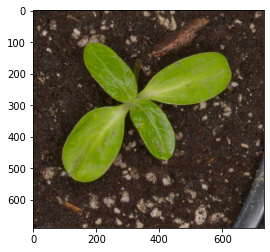

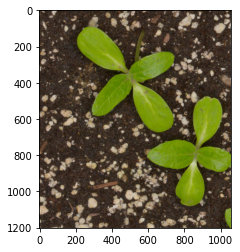

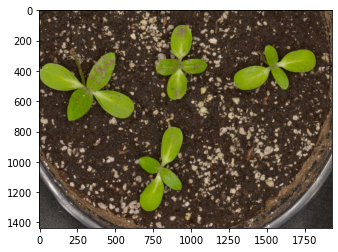

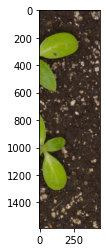

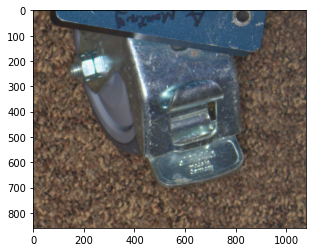

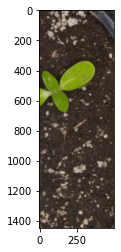

KeyboardInterrupt: 

In [2]:
from datasets import ImageData
csv_path = "../data/data/trial/NC_2022-03-29/detections.csv"
imgdir = Path("/home/admin_mkutugata/SemiF-AnnotationPipeline/data/data/trial/NC_2022-03-29/developed")

df = pd.read_csv(csv_path).drop(columns=['Unnamed: 0'])
# df = df.set_index("imgname")
bboxes = df.groupby(by='imgname', sort=True).apply(lambda x: x.to_dict(orient='records'))
img_list = list(bboxes.keys())

for img in img_list:
    imgf = Path(imgdir, img)
    imgd = ImageData(image_id=str(imgf.stem), image_path=str(imgf))
    # im = cv2.imread(str(imgf))
    im = imgd.array
    for box in bboxes[Path(img).name]:
        xmin = int(box["xmin"])
        xmax = int(box["xmax"])
        ymin = int(box["ymin"])
        ymax = int(box["ymax"])
        nimg = im[ymin:ymax,xmin:xmax]
        plt.imshow(nimg)
        plt.show()


In [3]:
df

,xmin,ymin,xmax,ymax,confidence,class,name,imgname
0,3921.262939,2293.610352,5509.208008,3950.745361,0.919427,0,plant,DSC00004.jpg
1,1865.411133,0.355214,3364.779541,1173.500854,0.897612,0,plant,DSC00004.jpg
2,1583.563721,1810.350952,2579.288086,3003.854004,0.886256,0,plant,DSC00004.jpg
3,4028.269775,140.661499,6112.729980,1545.644775,0.821707,0,plant,DSC00004.jpg
4,2576.414307,1833.760010,3549.047119,2653.425049,0.773513,0,plant,DSC00004.jpg
...,...,...,...,...,...,...,...,...
304,400.983459,2338.766357,1112.593750,2994.360107,0.617131,0,plant,row1_1.jpg
305,1191.346924,4535.640625,2257.152588,5763.981934,0.605758,0,plant,row1_1.jpg
306,2.388007,1465.519897,426.760132,3168.971680,0.586300,0,plant,row1_1.jpg
307,2.705201,3958.613770,468.573273,5513.527344,0.508044,0,plant,row1_1.jpg
